## Importing required packages

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy.special import boxcox
from scipy import stats
import matplotlib.pyplot as plt
sns.set()


from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

## Importing data

In [2]:
#Importing the Dataset and Cleaning
Data = pd.read_csv("innercity.csv")
Data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


## EDA

In [3]:
rows_count, columns_count = Data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 21613
Total Number of columns : 23


In [4]:
#Summarizing the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

From the data information output, it can be observed that there are no Nan values. All the variables are of either int dtype or float dtype. The day hours is the only object datatype.

In [5]:
#Finding statistical details
Data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.196687,1.718687e+04
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.397503,4.158908e+04
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.423000e+03
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.300000e+04
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.652659e+06


In [6]:
#Column labels
Data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [7]:
#Layout of the arrays
Data.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [8]:
#All attributes are numeric except for dayhours
Data.dayhours.value_counts()

20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150527T000000      1
20141102T000000      1
20150131T000000      1
20150524T000000      1
20150215T000000      1
Name: dayhours, Length: 372, dtype: int64

In [9]:
#Detecting missing value
Data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [10]:
Data.isnull().values.any()

False

In [11]:
# looking at the number of unique values in the data for each feature
Data.nunique()

cid                 21436
dayhours              372
price                3625
room_bed               13
room_bath              30
living_measure       1038
lot_measure          9782
ceil                    6
coast                   2
sight                   5
condition               5
quality                12
ceil_measure          946
basement              306
yr_built              116
yr_renovated           70
zipcode                70
lat                  5034
long                  752
living_measure15      777
lot_measure15        8689
furnished               2
total_area          11163
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248C3760048>]],
      dtype=object)

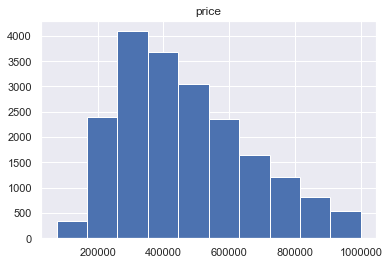

In [12]:
# Featurizing
# examining the target variable data distribution
Data=Data[Data['price'] <= 1000000]
#cut out over 1000000 for more normal distribution
Data.hist(column='price')

## Data Visualization

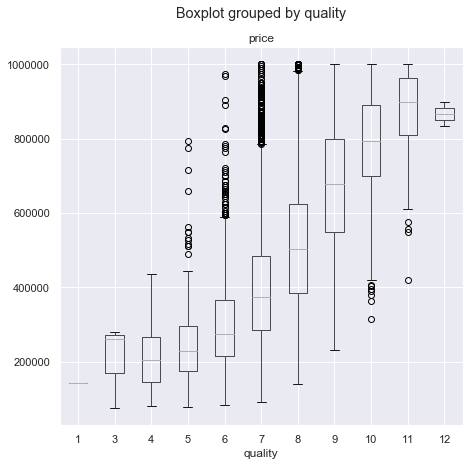

In [13]:
#Visualizing quality and price distribution
Data.boxplot('price', by = 'quality',figsize=(7,7))

Maximum houses have quality 7

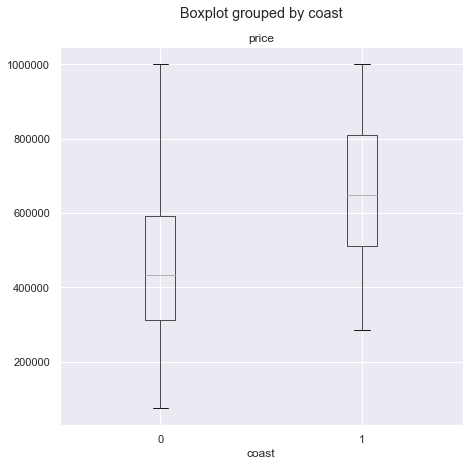

In [14]:
#Visualizing coast and price distribution
Data.boxplot('price', by = 'coast',figsize=(7,7))

Houses with waterfront view has higher price

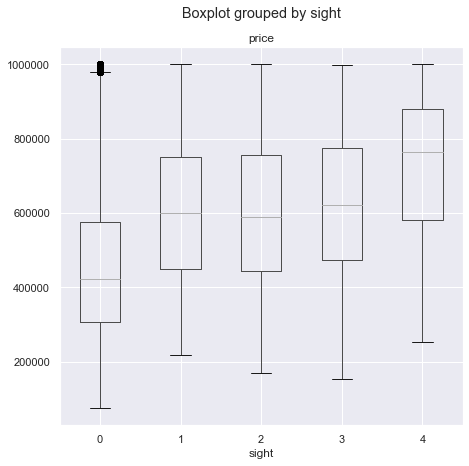

In [15]:
#Visualizing sight and price distribution
Data.boxplot('price', by = 'sight',figsize=(7,7))

A property was viewed for a maximum of 4 times

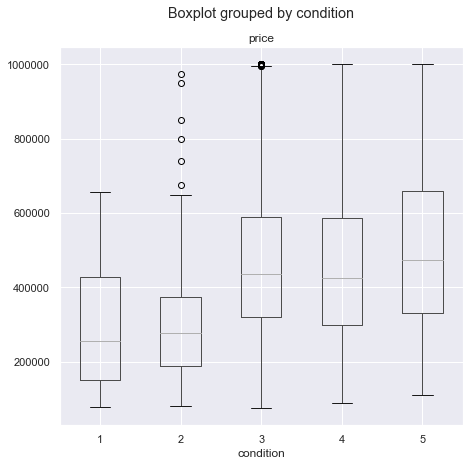

In [16]:
#Visualizing condition and price distribution
Data.boxplot('price', by = 'condition',figsize=(7,7))

Most of the houses have condition 3 which has an impact on higher price 

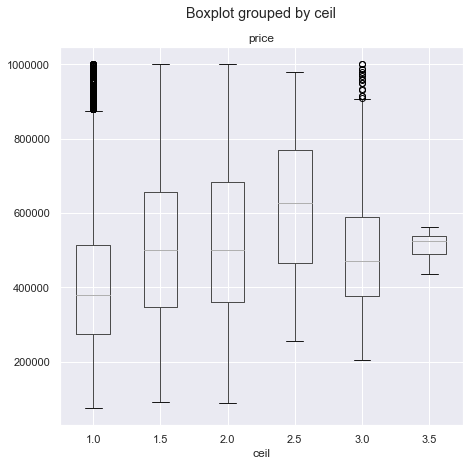

In [17]:
#Visualizing ceil and price distribution
Data.boxplot('price', by = 'ceil',figsize=(7,7))

3 storeyed building has higher price range

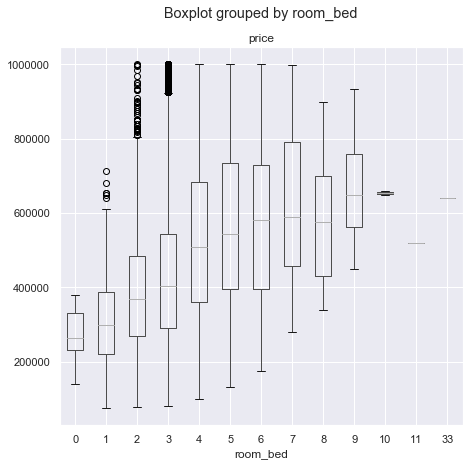

In [18]:
#Visualizing room_bed and price distribution
Data.boxplot('price', by = 'room_bed',figsize=(7,7))

Most of the houses have 2 or 3 bedrooms

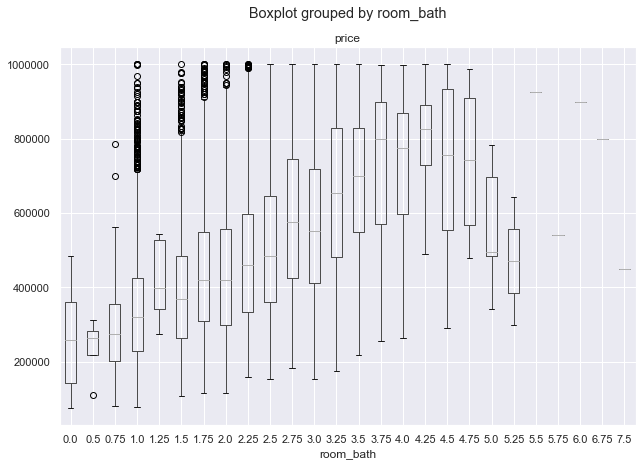

In [19]:
#Visualizing room_bath and price distribution
Data.boxplot('price', by = 'room_bath',figsize=(10,7))

Average number of bathrroms ranges between 2-4

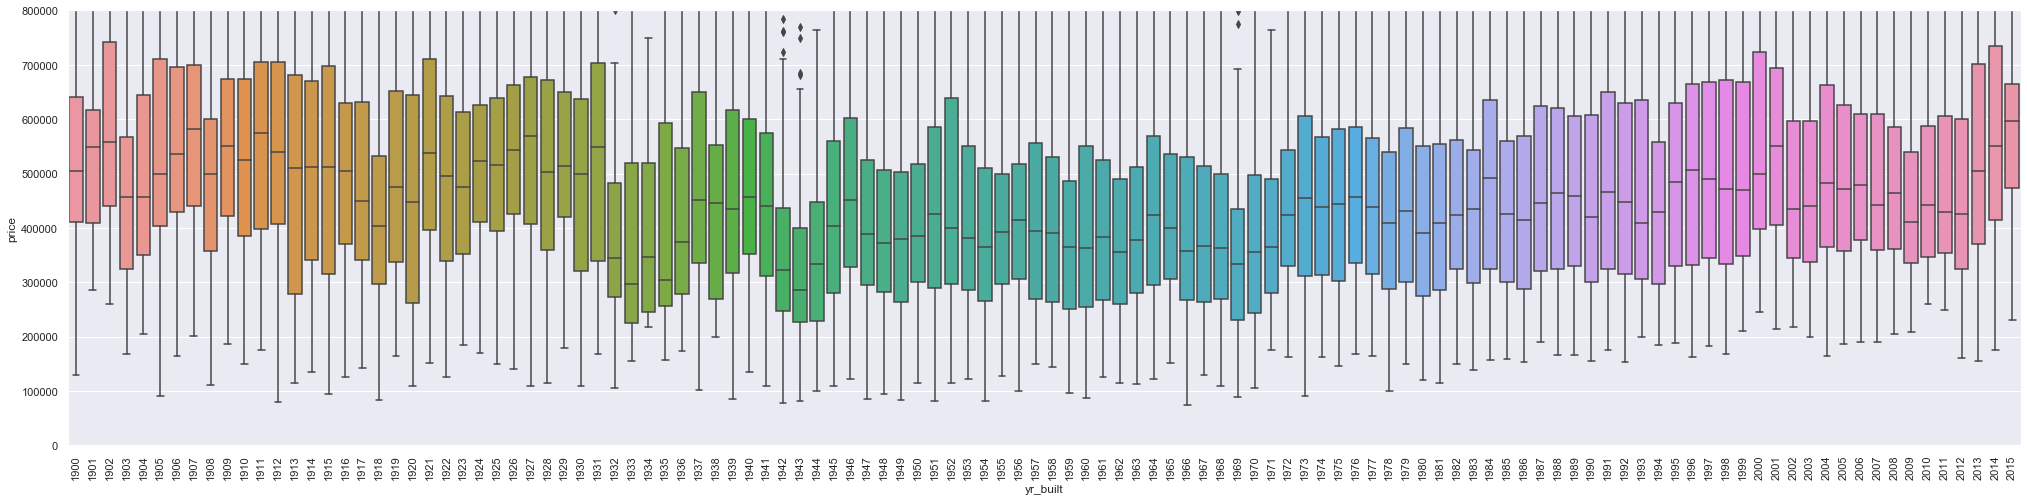

In [20]:
#Visualization needed since this attribute has a large dataset
var = 'yr_built'
data = pd.concat([Data['price'], Data[var]], axis=1)
f, ax = plt.subplots(figsize=(35, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

The dataset contains houses built from year 1900 to 2015

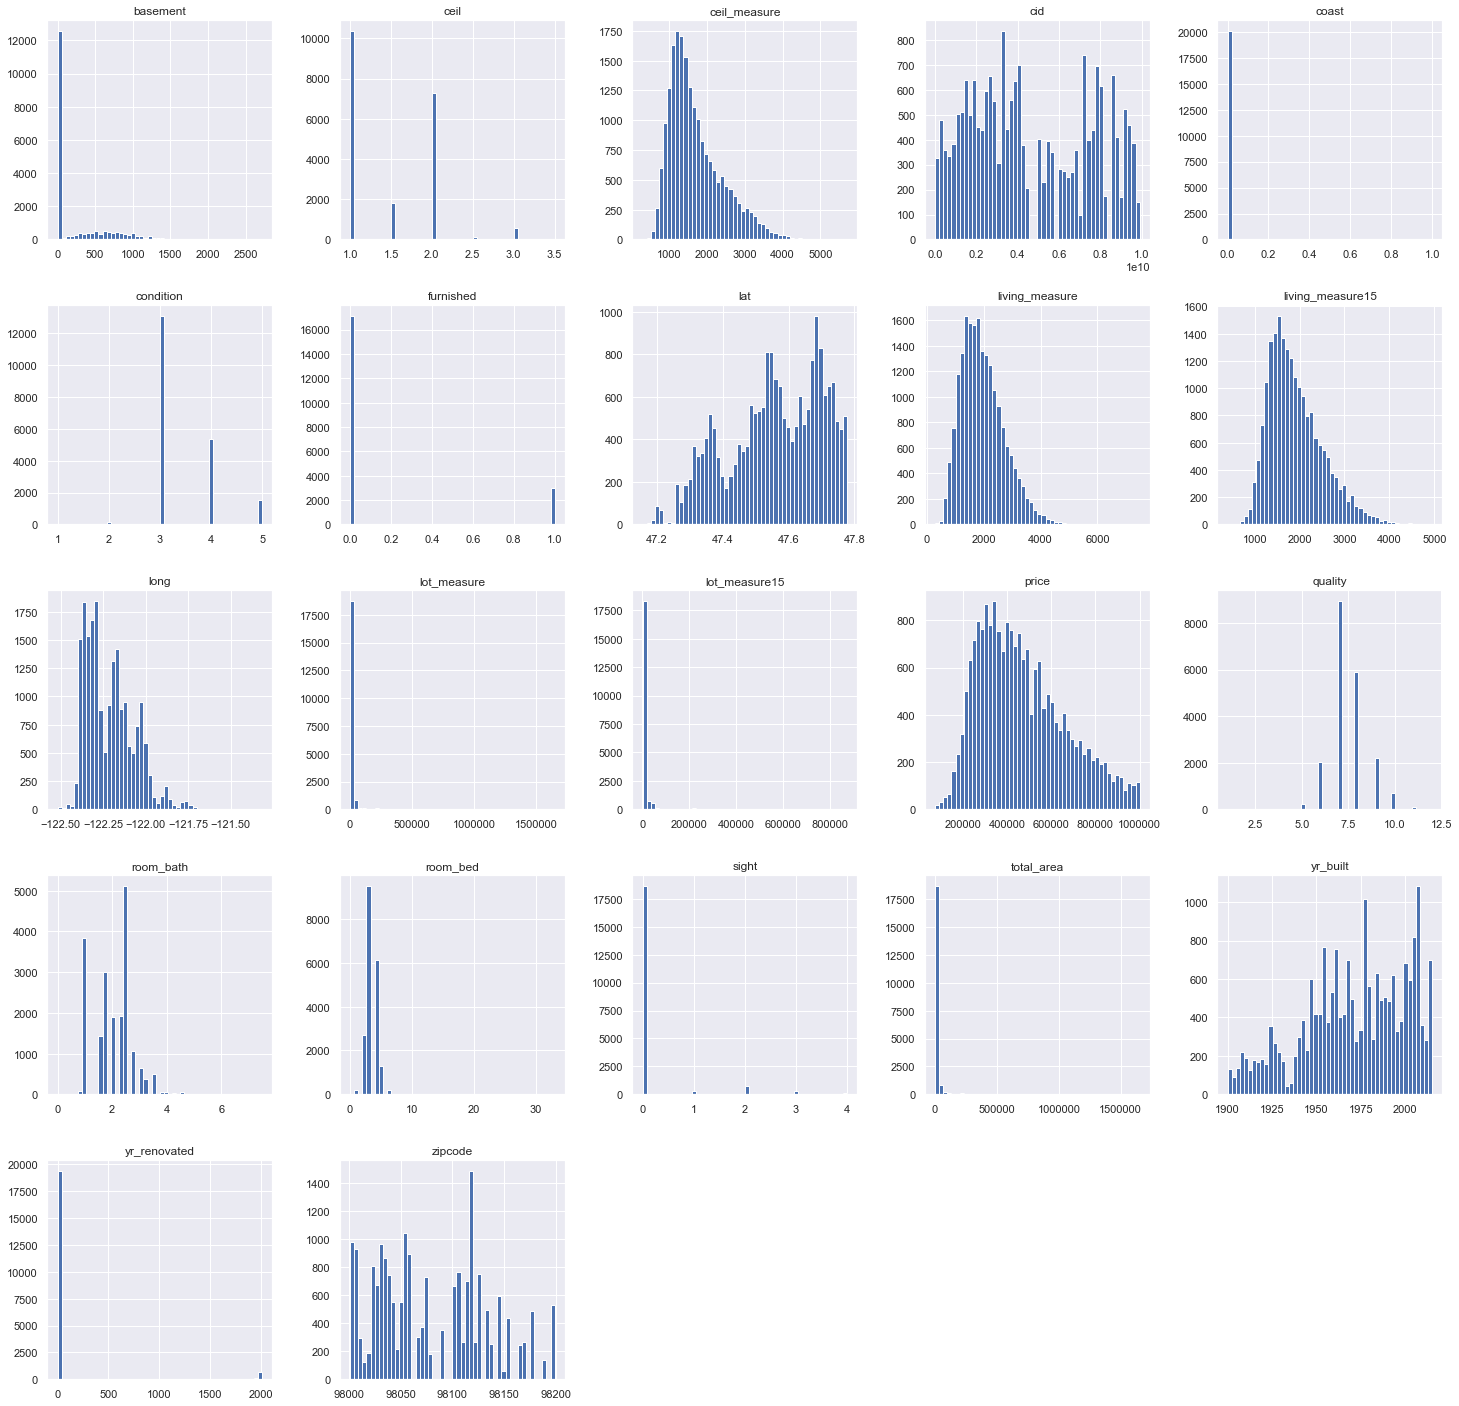

In [21]:
#examining the distribution of data for all variables in the data
Data.hist(figsize=(25,25),bins=50);

1] Most of the houses have no basement.
2] Most of the houses have only 1 floor as mentioned in ceil.
3] Ceil measure ranges between 1000-2000 for maximum number of houses.
4] No house has waterfront view
5] Condition mostly has the range 3.
6] Very less number of houses furnished.
7] Quality of the houses range at 7 the most.
8] The histograms of Price and living_measure are right-skewed.

In [22]:
corr=Data.corr()

In [23]:
corr

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
cid,1.000000,0.017267,0.010661,0.026764,0.011256,-0.133775,0.031258,0.001999,0.017392,-0.026688,...,-0.004339,0.027182,-0.021264,-0.005972,0.004236,0.021185,0.013508,-0.144310,0.009941,-0.133145
price,0.017267,1.000000,0.289105,0.439805,0.604379,0.093852,0.269447,0.052715,0.214121,0.034349,...,0.222084,0.058022,0.076460,-0.018851,0.440662,0.077184,0.549448,0.081566,0.500082,0.104950
room_bed,0.010661,0.289105,1.000000,0.489407,0.586496,0.023652,0.150946,-0.030162,0.030610,0.026639,...,0.281475,0.159347,0.002339,-0.148874,-0.033470,0.138896,0.369096,0.020048,0.198953,0.034632
room_bath,0.026764,0.439805,0.489407,1.000000,0.711350,0.061481,0.501650,-0.005897,0.083478,-0.138243,...,0.216962,0.548392,0.021998,-0.210765,-0.016536,0.248914,0.520800,0.061351,0.391246,0.074697
living_measure,0.011256,0.604379,0.586496,0.711350,1.000000,0.156514,0.336746,0.002450,0.151188,-0.074327,...,0.373323,0.355996,0.017630,-0.209502,0.000873,0.289109,0.731749,0.170166,0.554504,0.174873
lot_measure,-0.133775,0.093852,0.023652,0.061481,0.156514,1.000000,-0.018775,0.025961,0.081524,-0.002449,...,0.012790,0.040761,0.012511,-0.128954,-0.096172,0.217886,0.140740,0.706326,0.109195,0.999827
ceil,0.031258,0.269447,0.150946,0.501650,0.336746,-0.018775,1.000000,-0.004820,-0.016662,-0.278161,...,-0.300173,0.514245,-0.004630,-0.066450,0.033178,0.136625,0.266930,-0.023150,0.319401,-0.012369
coast,0.001999,0.052715,-0.030162,-0.005897,0.002450,0.025961,-0.004820,1.000000,0.302966,0.015792,...,0.014262,-0.040485,0.057686,0.043609,-0.046190,-0.061397,0.004259,0.032557,-0.004683,0.025926
sight,0.017392,0.214121,0.030610,0.083478,0.151188,0.081524,-0.016662,0.302966,1.000000,0.030467,...,0.183449,-0.067296,0.058180,0.100870,-0.032874,-0.076837,0.170907,0.077937,0.102246,0.084119
condition,-0.026688,0.034349,0.026639,-0.138243,-0.074327,-0.002449,-0.278161,0.015792,0.030467,1.000000,...,0.177031,-0.350749,-0.059016,-0.007289,-0.019198,-0.098214,-0.121996,0.002682,-0.146436,-0.003843


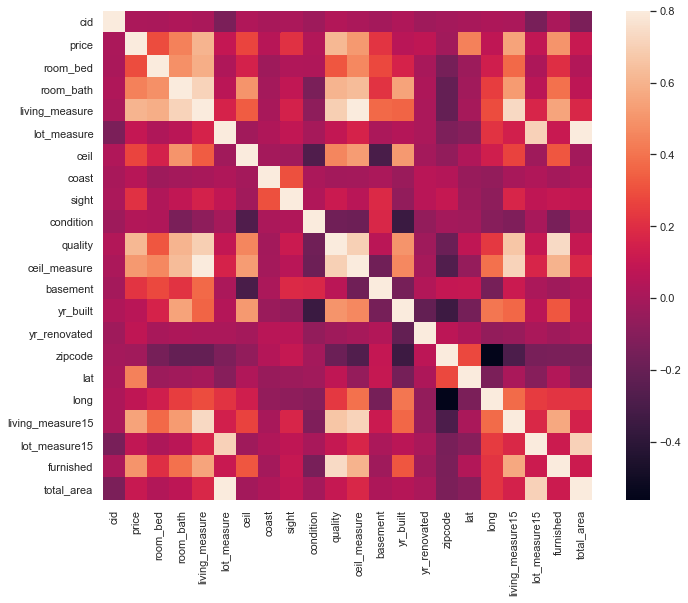

In [24]:
#correlation matrix
corrmat = Data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

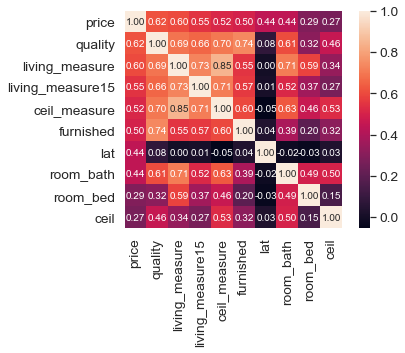

In [25]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The features quality, living_measure, living_measure15, ceil_measure displayed the highest correlation with the price of the house.
Moreover, there is a high correlation of living_measure  with e.g. number of bathrooms and grade. This is common sense, as the square feet increase, so does the number of floors and bathrooms. 

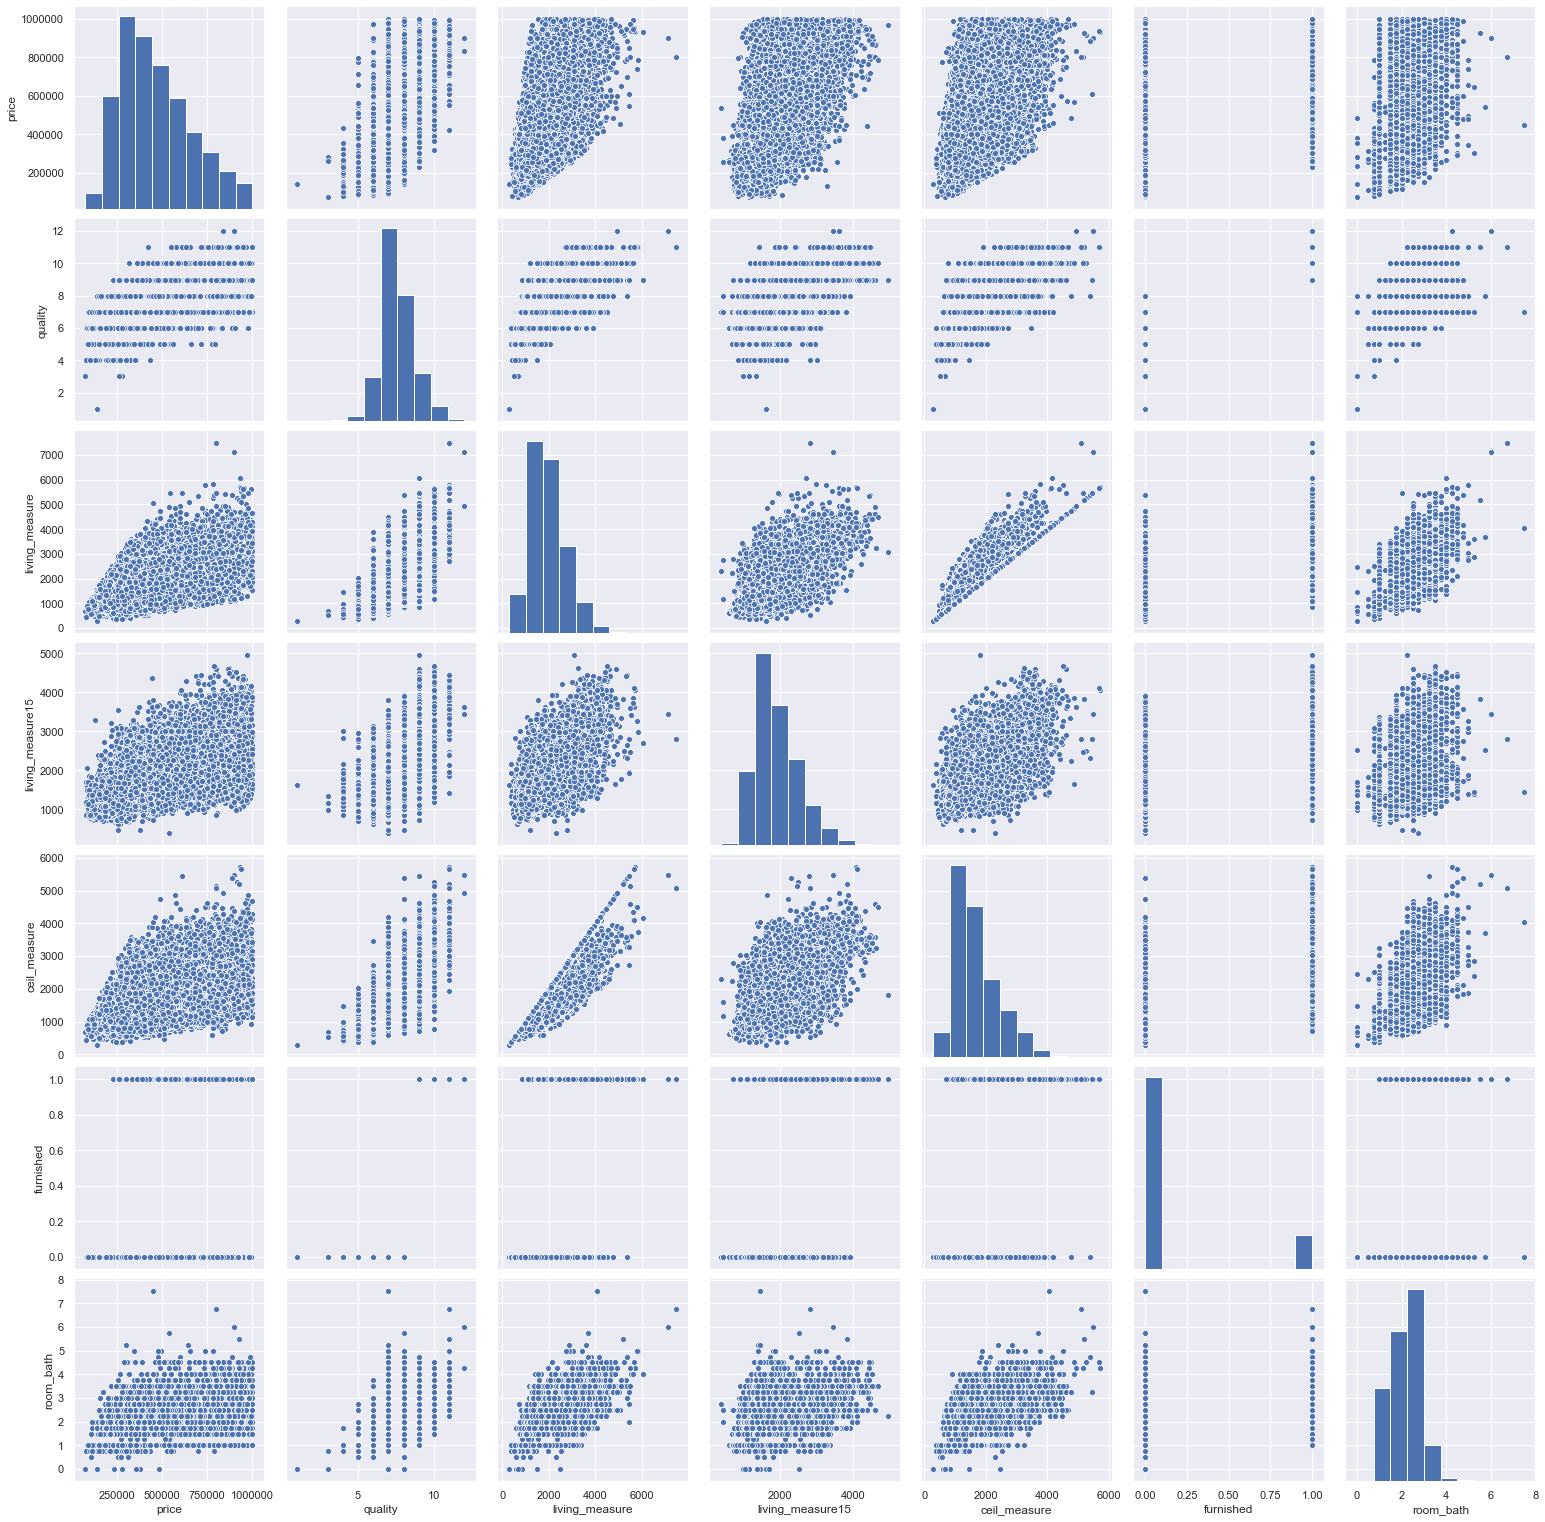

In [26]:
sns.set()
cols = ['price', 'quality', 'living_measure', 'living_measure15', 'ceil_measure', 'furnished', 'room_bath']
sns.pairplot(Data[cols],size=3)
plt.show()

It is clear that with quality, living_measure, living_measure15, ceil_measure, furnished and room_bath features price of houses increase significantly

In [27]:
cor = Data.drop(['price'], axis=1).corr()
for i, col in enumerate(cor.columns):
    for row in cor.index[i+1:]:
        if col != row and cor[col][row] > 0.7:
            print(f'({row}, {col}): {cor[col][row]}')

(living_measure, room_bath): 0.7113500184102091
(ceil_measure, living_measure): 0.8501254962484194
(living_measure15, living_measure): 0.731749494485066
(lot_measure15, lot_measure): 0.70632559620109
(total_area, lot_measure): 0.9998267177195838
(ceil_measure, quality): 0.7003502999935569
(furnished, quality): 0.7389531540038449
(living_measure15, ceil_measure): 0.7121409020163229
(total_area, lot_measure15): 0.7073268418902066


From the plots above, we can see that few variables are highly correlated, and it makes sense for them to be correlated. Hence, for now we might want to keep them.

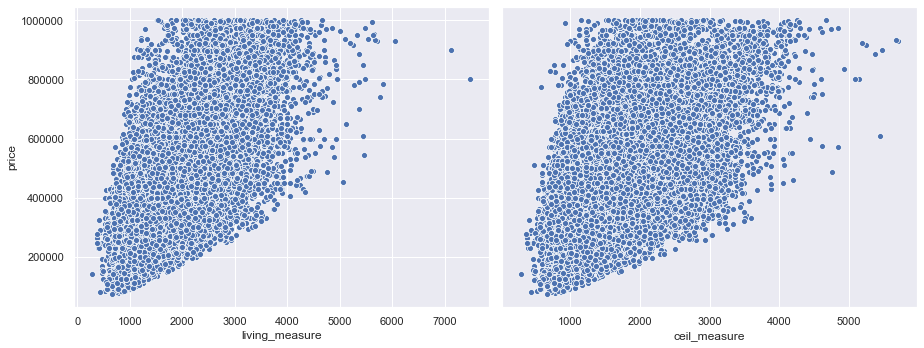

In [28]:
#Scatterplot for Multivariate analysis
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1) # n is the position of your subplot (1 to 4)
sns.scatterplot(Data['living_measure'],Data['price'])
plt.subplot(1, 2, 2) # n is the position of your subplot (1 to 4)
sns.scatterplot(Data['ceil_measure'],Data['price'])
w = plt.gca().get_yaxis() 
w.set_visible(False) 
plt.tight_layout()

The price certainly increases with living_measure and ceil_measure attributes.

In [29]:
#standardizing data to mitigate skewness and kurtosis
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(Data['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.99904554]
 [-1.98377916]
 [-1.97360157]
 [-1.96851278]
 [-1.96342399]
 [-1.96087959]
 [-1.95833519]
 [-1.9532464 ]
 [-1.94815761]
 [-1.94815761]]

outer range (high) of the distribution:
[[2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]
 [2.70808819]]


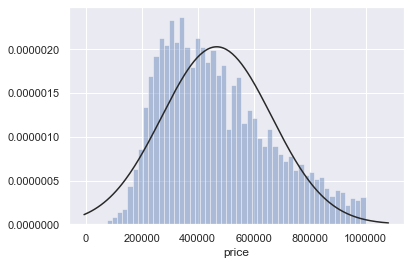

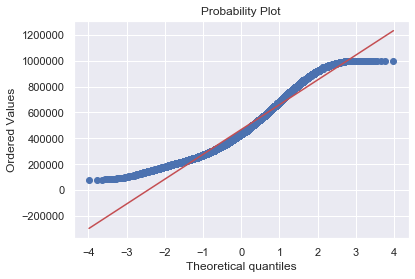

In [30]:
#normalizing living_measure and price
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(Data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['price'], plot=plt)

In [31]:
#log fitted to a normal distribution curve
#applying log transformation

Data['price'] = np.log(Data['price'])

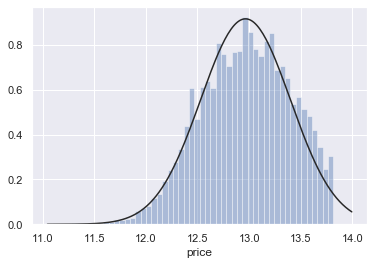

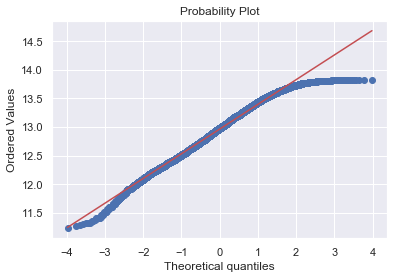

In [32]:
#transformed histogram and normal probability plot
sns.distplot(Data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['price'], plot=plt)

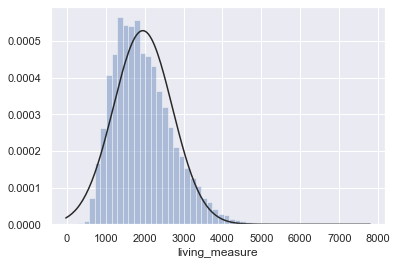

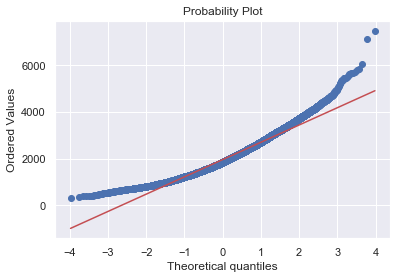

In [33]:
#histogram and normal probability plot
sns.distplot(Data['living_measure'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['living_measure'], plot=plt)

In [34]:
#data transformation
Data['living_measure'] = np.log(Data['living_measure'])

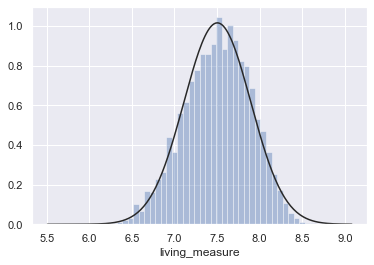

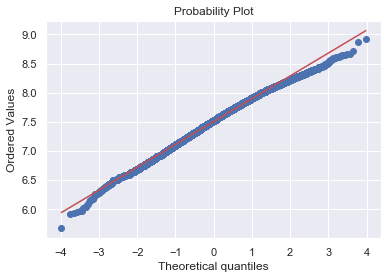

In [35]:
#transformed histogram and normal probability plot
sns.distplot(Data['living_measure'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(Data['living_measure'], plot=plt)

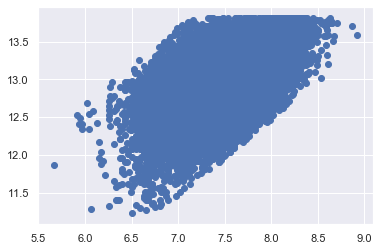

In [36]:
#scatter plot for visualizing linear relationship between the attributes
plt.scatter(Data['living_measure'], Data['price']);

## Feature Selection & Data Split

In [37]:
X = Data.drop('price',axis =1).values
y = Data['price'].values
#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
Data

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,13.602441,4,3.25,8.013012,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,12.533576,4,2.50,7.843849,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,12.909170,3,2.50,7.770645,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,12.611538,2,1.00,6.709304,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,13.457406,2,1.50,7.244228,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5137800030,20140701T000000,12.611538,4,2.50,7.741968,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,12.676076,4,2.50,8.157657,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,13.088709,4,2.75,7.933797,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,12.807653,2,2.00,7.272398,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440


# Multiple Regression

In [39]:
df= Data

In [40]:
df.drop(['zipcode', 'lat','long','cid','dayhours'], axis=1, inplace=True)

In [41]:
df.loc[:, df.columns != 'price'].columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area'],
      dtype='object')

In [42]:
# Split the dataset into train and test sets
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [43]:
# Instantiate the linear regressior
lr = linear_model.LinearRegression()

# Define the train and test sets
X_train = train_set.loc[:, train_set.columns != 'price']
y_train = train_set['price']
X_test = test_set.loc[:, train_set.columns != 'price']
y_test = test_set['price']

# Fit the model
lr.fit(X_train, y_train)

# Generate predictions
y_pred = lr.predict(X_test)

In [44]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': lr.score(X_train, y_train), 
                       'R^2(test)': lr.score(X_test, y_test), 
                       'Adjusted R^2(train)': lr.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': lr.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '5-Fold Cross Validation': 
                           cross_val_score(lr, df.loc[:, df.columns != 'price'], df[['price']], cv=5).mean()
                      }, index=['Multiple linear regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),5-Fold Cross Validation
Multiple linear regression,0.538755,0.533493,0.538389,0.533122,0.53653


# Random forest regression

# Random Hyperparameter Grid

In [45]:
# Instantiate the random forest regressior
from sklearn.ensemble import RandomForestRegressor 

# Define the train and test sets
X_train = train_set.loc[:, train_set.columns != 'price']
y_train = train_set['price']
X_test = test_set.loc[:, train_set.columns != 'price']
y_test = test_set['price']


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.7s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [48]:
lr = RandomForestRegressor(n_estimators = 200, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=50, bootstrap='true')   


# Fit the model
lr.fit(X_train, y_train)

# Generate predictions
y_pred = lr.predict(X_test)

In [49]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': lr.score(X_train, y_train), 
                       'R^2(test)': lr.score(X_test, y_test), 
                       'Adjusted R^2(train)': lr.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': lr.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '5-Fold Cross Validation': 
                           cross_val_score(lr, df.loc[:, df.columns != 'price'], df[['price']], cv=5).mean()
                      }, index=['Random forest regression'])
result

,R^2(train),R^2(test),Adjusted R^2(train),Adjusted R^2(test),5-Fold Cross Validation
Random forest regression,0.832735,0.620383,0.832602,0.620081,0.627967


# Gradient boosting

# Random Hyperparameter Grid

In [50]:
# Define the train and test sets
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lr = GradientBoostingRegressor(n_estimators = 80, learning_rate=0.1, max_depth = 1, random_state = 0, loss = 'ls').fit(X_train, y_train)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.6s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.7s finished


In [ ]:
rf_random.best_params_

In [ ]:
lr = GradientBoostingRegressor(n_estimators = 200, learning_rate=0.1, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=50, loss = 'ls').fit(X_train, y_train)

# Fit the model
lr.fit(X_train, y_train)

# Generate predictions
y_pred = lr.predict(X_test)

In [ ]:
k = df.loc[:, train_set.columns != 'price'].shape[1]
n = df.shape[0]
# Add the new results to the result DataFrame
result = pd.DataFrame({
                       'R^2(train)': lr.score(X_train, y_train), 
                       'R^2(test)': lr.score(X_test, y_test), 
                       'Adjusted R^2(train)': lr.score(X_train, y_train)-(k-1)/(n-k)*(1-lr.score(X_train, y_train)),
                       'Adjusted R^2(test)': lr.score(X_test, y_test)-(k-1)/(n-k)*(1-lr.score(X_test, y_test)), 
                       '5-Fold Cross Validation': 
                           cross_val_score(lr, df.loc[:, df.columns != 'price'], df[['price']], cv=5).mean()
                      }, index=['Gradient boosting'])
result